In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
all_data_df = pd.read_csv('all_data.csv')

print(all_data_df.info())
print(all_data_df.head(17))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB
None
   Country  Year  Life expectancy at birth (years)           GDP
0    Chile  2000                              77.3  7.786093e+10
1    Chile  2001                              77.3  7.097992e+10
2    Chile  2002                              77.8  6.973681e+10
3    Chile  2003                              77.9  7.564346e+10
4    Chile  2004                              78.0  9.921039e+10
5    Chile  2005                              78.4  1.229650e+1

In [3]:
chile_df = all_data_df[all_data_df['Country'] == 'Chile']
china_df = all_data_df[all_data_df['Country'] == 'China'].reset_index()
germany_df = all_data_df[all_data_df['Country'] == 'Germany'].reset_index()
mexico_df = all_data_df[all_data_df['Country'] == 'Mexico'].reset_index()
us_df = all_data_df[all_data_df['Country'] == 'United States of America'].reset_index()
zimbabwe_df = all_data_df[all_data_df['Country'] == 'Zimbabwe'].reset_index()

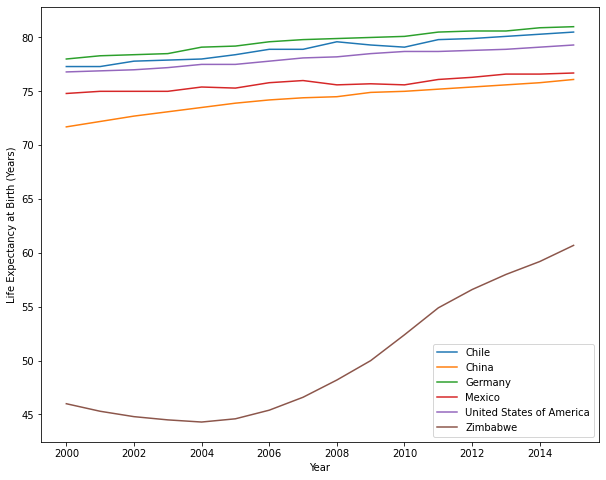

<Figure size 432x288 with 0 Axes>

In [4]:
plt.figure(figsize=(10,8))
plt.plot(chile_df['Year'],chile_df['Life expectancy at birth (years)'], label = 'Chile')
plt.plot(china_df['Year'],china_df['Life expectancy at birth (years)'], label = 'China')
plt.plot(germany_df['Year'],germany_df['Life expectancy at birth (years)'], label = 'Germany')
plt.plot(mexico_df['Year'],mexico_df['Life expectancy at birth (years)'], label = 'Mexico')
plt.plot(us_df['Year'],us_df['Life expectancy at birth (years)'], label = 'United States of America')
plt.plot(zimbabwe_df['Year'],zimbabwe_df['Life expectancy at birth (years)'], label = 'Zimbabwe')
plt.legend()
plt.xlabel("Year")
plt.ylabel("Life Expectancy at Birth (Years)")
plt.show()
plt.clf()

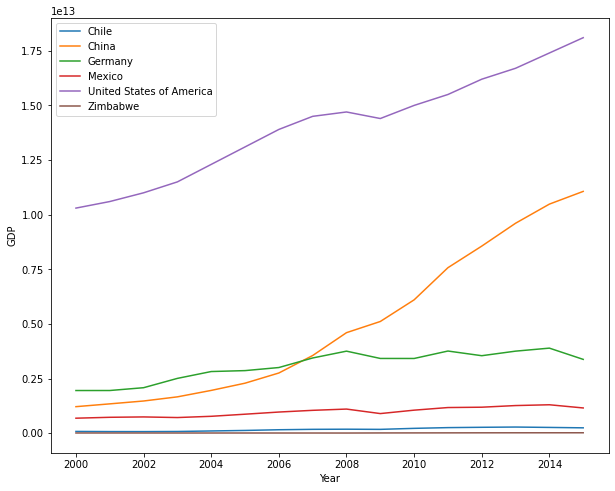

<Figure size 432x288 with 0 Axes>

In [5]:
plt.figure(figsize=(10,8))
plt.plot(chile_df['Year'],chile_df['GDP'], label = 'Chile')
plt.plot(china_df['Year'],china_df['GDP'], label = 'China')
plt.plot(germany_df['Year'],germany_df['GDP'], label = 'Germany')
plt.plot(mexico_df['Year'],mexico_df['GDP'], label = 'Mexico')
plt.plot(us_df['Year'],us_df['GDP'], label = 'United States of America')
plt.plot(zimbabwe_df['Year'],zimbabwe_df['GDP'], label = 'Zimbabwe')
plt.legend()
plt.xlabel("Year")
plt.ylabel("GDP")
plt.show()
plt.clf()

In [8]:
def calculate_percent_change(df : pd.DataFrame):
    percent_change = []

    for ind in range(len(df['GDP'])):
        if ind == 0:
            gdp_change = 0
        else:
            gdp_change = (df['GDP'][ind]-df['GDP'][ind-1])/df['GDP'][ind-1]
        percent_change.append(gdp_change)

    df['change_GDP'] = percent_change

    return df

chile_df = calculate_percent_change(chile_df)
china_df = calculate_percent_change(china_df)
germany_df = calculate_percent_change(germany_df)
mexico_df = calculate_percent_change(mexico_df)
us_df = calculate_percent_change(us_df)
zimbabwe_df = calculate_percent_change(zimbabwe_df)

/var/folders/_q/vhtrs8t15bgdg8st8nm6c2780000gn/T/ipykernel_3916/3750063566.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['change_GDP'] = percent_change


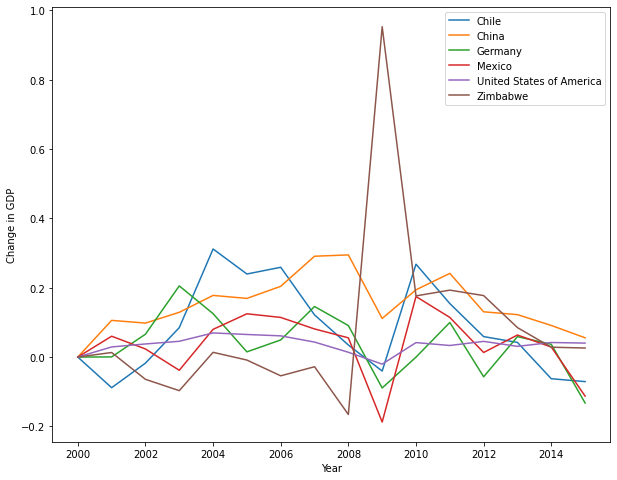

<Figure size 432x288 with 0 Axes>

In [7]:
plt.figure(figsize=(10,8))
plt.plot(chile_df['Year'],chile_df['change_GDP'], label = 'Chile')
plt.plot(china_df['Year'],china_df['change_GDP'], label = 'China')
plt.plot(germany_df['Year'],germany_df['change_GDP'], label = 'Germany')
plt.plot(mexico_df['Year'],mexico_df['change_GDP'], label = 'Mexico')
plt.plot(us_df['Year'],us_df['change_GDP'], label = 'United States of America')
plt.plot(zimbabwe_df['Year'],zimbabwe_df['change_GDP'], label = 'Zimbabwe')
plt.legend()
plt.xlabel("Year")
plt.ylabel("Change in GDP")
plt.show()
plt.clf()

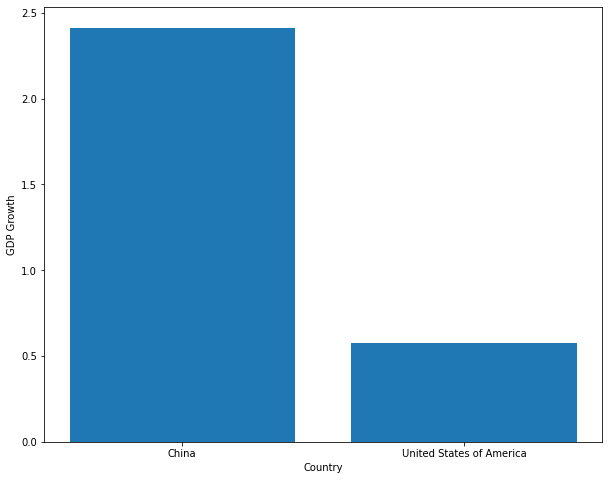

<Figure size 432x288 with 0 Axes>

In [12]:
china_gdp_growth = china_df['change_GDP'].sum()
us_gdp_growth = us_df['change_GDP'].sum()
x_values = ['China', 'United States of America']
y_values = [china_gdp_growth, us_gdp_growth]

plt.figure(figsize=(10,8))
plt.bar(x_values,y_values)
plt.xlabel('Country')
plt.ylabel('GDP Growth')
plt.show()
plt.clf()